# Imports

In [1]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from ml_lib.feature_store import configure_offline_feature_store
from ml_lib.feature_store.offline.client import FeatureStoreOfflineClient
from scipy.stats import norm
from datetime import datetime, timedelta
import random

from ab_testing.constants import client_name, target_col
from ab_testing.data_acquisition.acquire_data import queries_dict  # AcquireData
from ab_testing.distribution_fit.fit_distribution import FitDistribution
from ab_testing.predictions.produce_predictions import ProducePredictions
from bayesian_testing.experiments import BinaryDataTest, DeltaLognormalDataTest

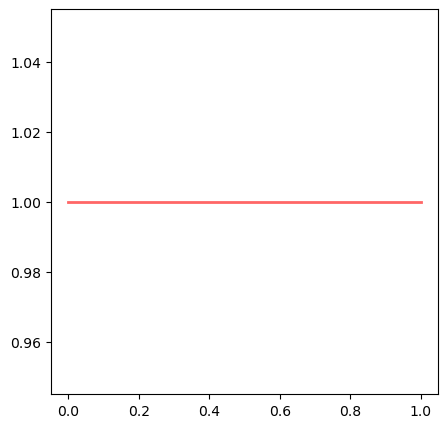

In [2]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, 1, 1),
       'r-', lw=2, alpha=0.6, label='norm pdf')

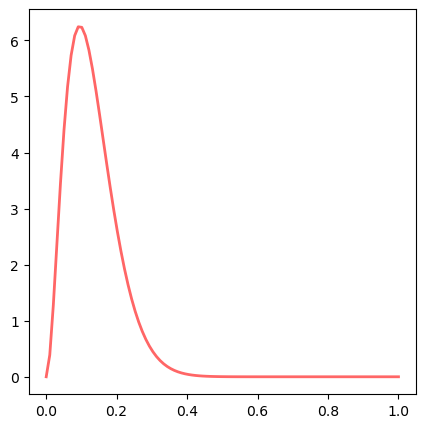

In [3]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, 3, 20),
       'r-', lw=2, alpha=0.6, label='norm pdf')

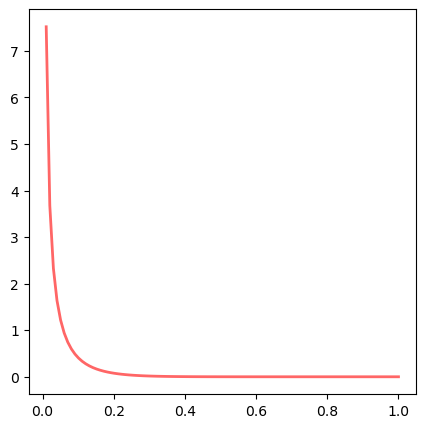

In [4]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, 0.1, 9.9),
       'r-', lw=2, alpha=0.6, label='norm pdf')

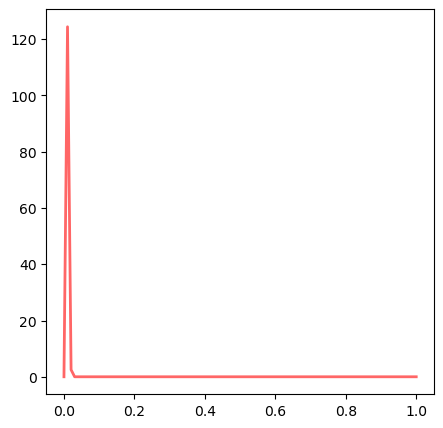

In [5]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(0, 1, 100)
ax.plot(x, scipy.stats.beta.pdf(x, 10, 990),
       'r-', lw=2, alpha=0.6, label='norm pdf')

In [14]:
list_beta_priors = [(1,1), (3,20), (0.1,9.9), (10,990)]
list_conversion_rates = [(0.01, 0.01), (0.01, 0.015), (0.01, 0.011), ((0.01, 0.0105))]
list_num_points = [1000, 10000, 100000, 1000000]

In [85]:
big_list_probabs_2 = []
big_list_results_2 = []

for i, conv_rate_tuple in enumerate(list_conversion_rates):
    for j, beta_prior_tuple in enumerate(list_beta_priors):
        print(i,j)
        list_probabs = []
        list_results = []
        for k in range(1000):
            A = np.random.binomial(1, conv_rate_tuple[0], 100000)
            B = np.random.binomial(1, conv_rate_tuple[1], 100000)

            # CONVERSION RATE TEST
            test_conversion = BinaryDataTest()

            test_conversion.add_variant_data(name = "A", data = A, a_prior = beta_prior_tuple[0], b_prior = beta_prior_tuple[1])
            test_conversion.add_variant_data(name = "B", data = B, a_prior = beta_prior_tuple[0], b_prior = beta_prior_tuple[1])

            res_conv_test = test_conversion.evaluate(seed=42)
            list_probabs.append(res_conv_test[0]['prob_being_best'])
            list_results.append(res_conv_test)

        big_list_probabs_2.append(list_probabs)
        big_list_results_2.append(list_results)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


<AxesSubplot:ylabel='Count'>

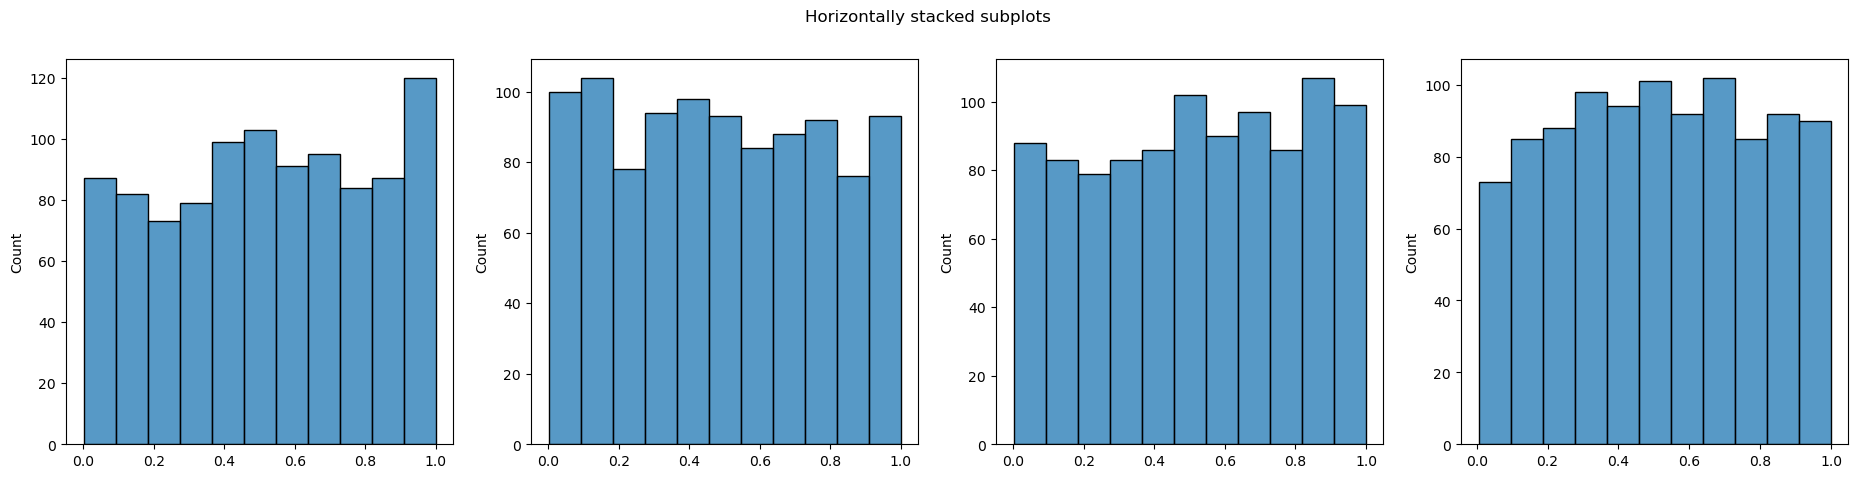

In [86]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_probabs_2[0], ax = ax[0])
sns.histplot(big_list_probabs_2[1], ax = ax[1])
sns.histplot(big_list_probabs_2[2], ax = ax[2])
sns.histplot(big_list_probabs_2[3], ax = ax[3])

<AxesSubplot:ylabel='Count'>

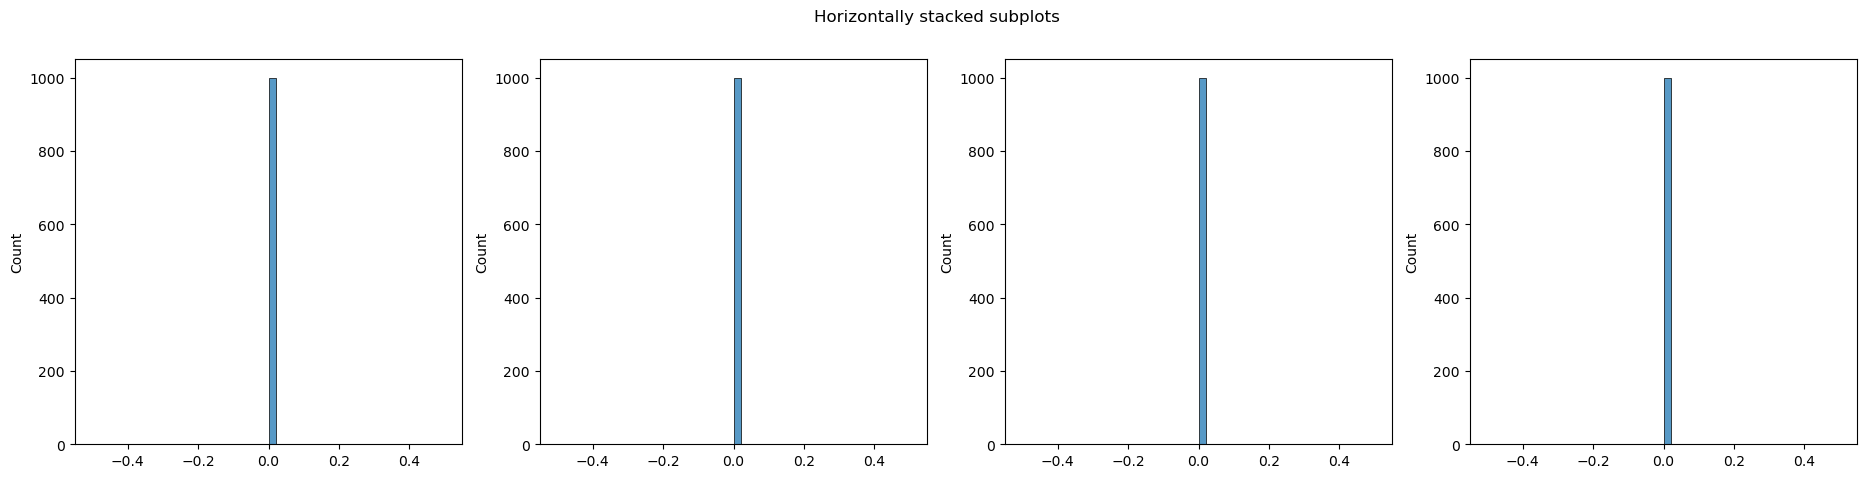

In [90]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_probabs_2[4], bins = 50, ax = ax[0])
sns.histplot(big_list_probabs_2[5], bins = 50, ax = ax[1])
sns.histplot(big_list_probabs_2[6], bins = 50, ax = ax[2])
sns.histplot(big_list_probabs_2[7], bins = 50, ax = ax[3])

<AxesSubplot:ylabel='Count'>

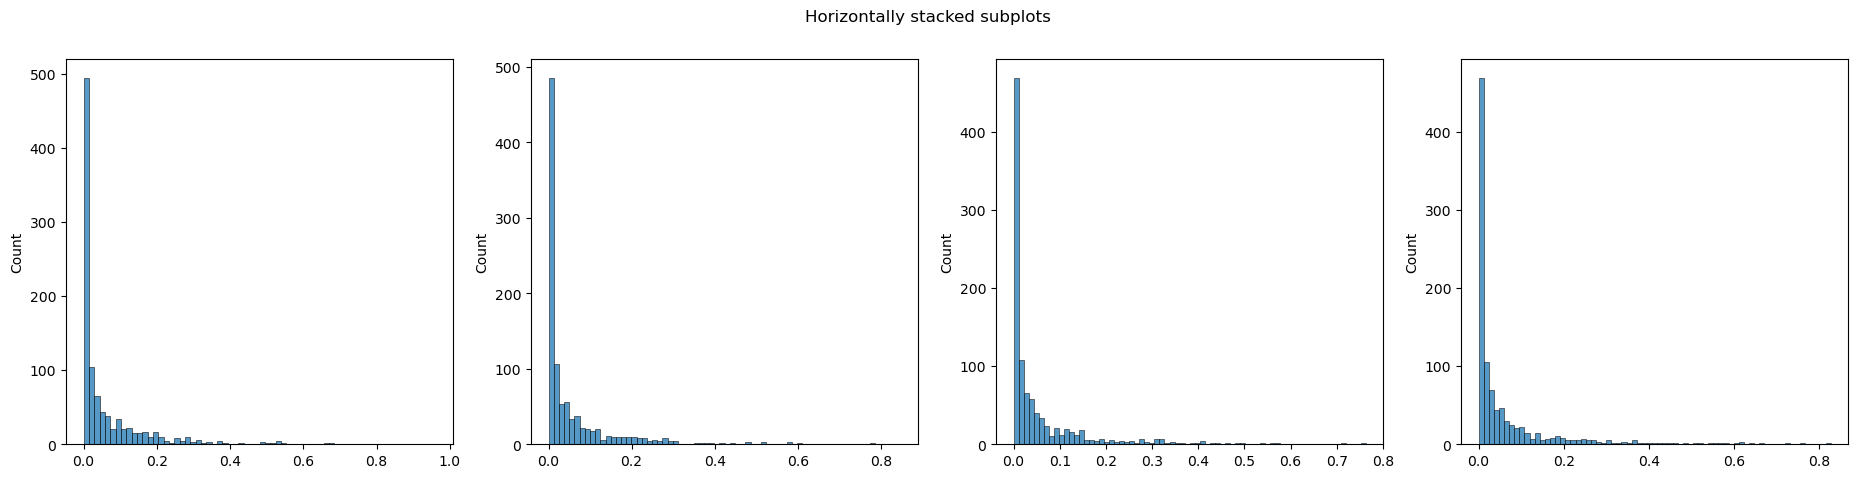

In [88]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_probabs_2[8], ax = ax[0])
sns.histplot(big_list_probabs_2[9], ax = ax[1])
sns.histplot(big_list_probabs_2[10], ax = ax[2])
sns.histplot(big_list_probabs_2[11], ax = ax[3])

<AxesSubplot:ylabel='Count'>

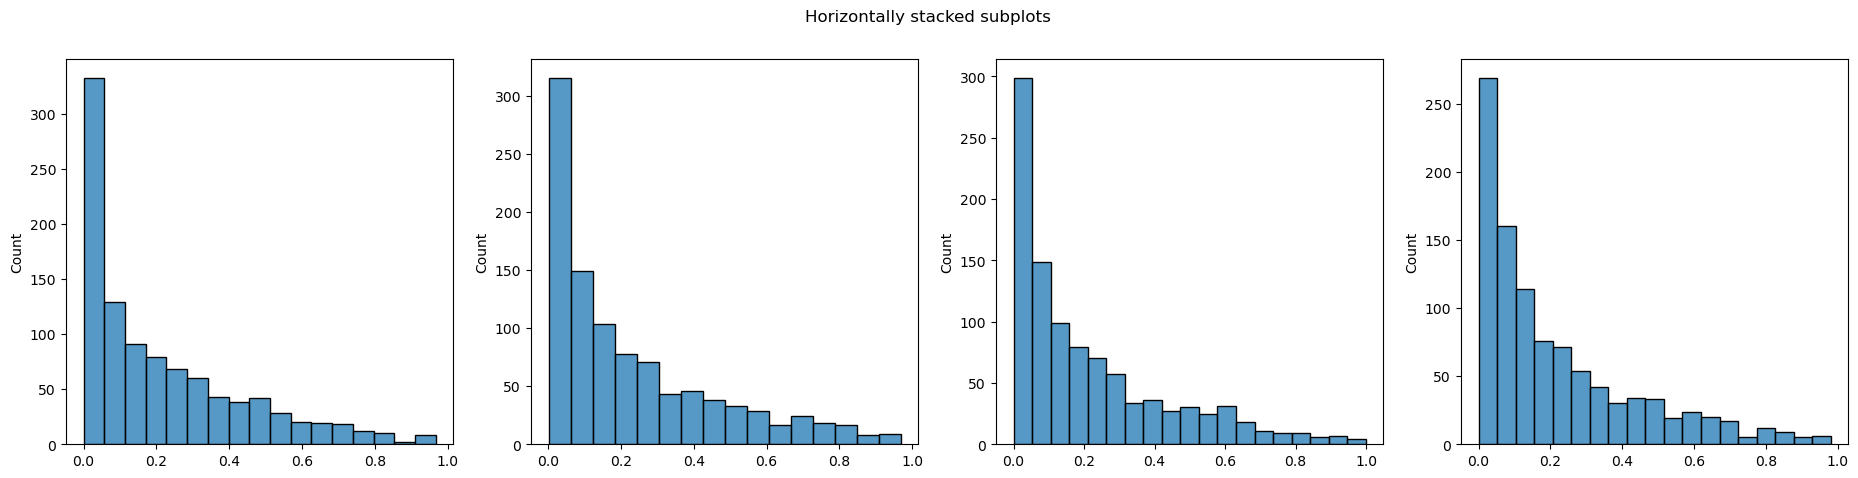

In [89]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_probabs_2[12], ax = ax[0])
sns.histplot(big_list_probabs_2[13], ax = ax[1])
sns.histplot(big_list_probabs_2[14], ax = ax[2])
sns.histplot(big_list_probabs_2[15], ax = ax[3])

In [16]:
# big_list_probabs = []
# big_list_results = []

# for i, conv_rate_tuple in enumerate(list_conversion_rates):
#     for j, num_data_points in enumerate(list_num_points):
#         print(i,j)
#         list_probabs = []
#         list_results = []
#         for k in range(1000):
#             A = np.random.binomial(1, conv_rate_tuple[0], num_data_points)
#             B = np.random.binomial(1, conv_rate_tuple[1], num_data_points)

#             # CONVERSION RATE TEST
#             test_conversion = BinaryDataTest()

#             test_conversion.add_variant_data(name = "A", data = A, a_prior = 1, b_prior = 1)
#             test_conversion.add_variant_data(name = "B", data = B, a_prior = 1, b_prior = 1)

#             res_conv_test = test_conversion.evaluate(seed=42)
#             list_probabs.append(res_conv_test[0]['prob_being_best'])
#             list_results.append(res_conv_test)

#         big_list_probabs.append(list_probabs)
#         big_list_results.append(list_results)

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [50]:
# with open('big_list_results.data', 'wb') as filehandle:
#     # Store the data as a binary data stream
#     pickle.dump(big_list_results, filehandle)

In [45]:
# with open('big_list_probabs.data', 'rb') as filehandle:
#     # Read the data as a binary data stream
#     C = pickle.load(filehandle)

In [65]:
big_list_gains = []
counter = 0
for i, conv_rate_tuple in enumerate(list_conversion_rates):
    for j, num_data_points in enumerate(list_num_points):
        print(i,j)
        list_gains = []
        for k in range(1000):
            res_conv_test = big_list_results[counter][k]
            list_gains.append(res_conv_test[0]['expected_total_gain'])

        big_list_gains.append(list_gains)
        counter += 1

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


<AxesSubplot:ylabel='Count'>

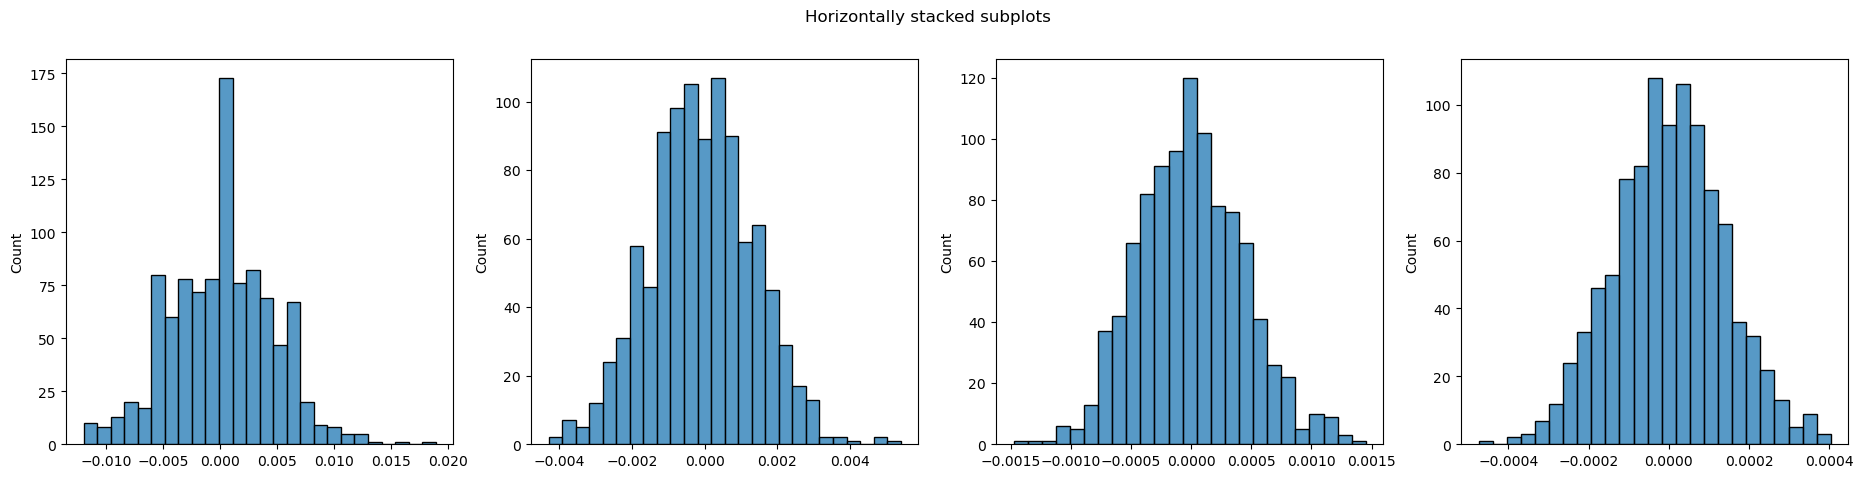

In [81]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_gains[0], ax = ax[0])
sns.histplot(big_list_gains[1], ax = ax[1])
sns.histplot(big_list_gains[2], ax = ax[2])
sns.histplot(big_list_gains[3], ax = ax[3])

<AxesSubplot:ylabel='Count'>

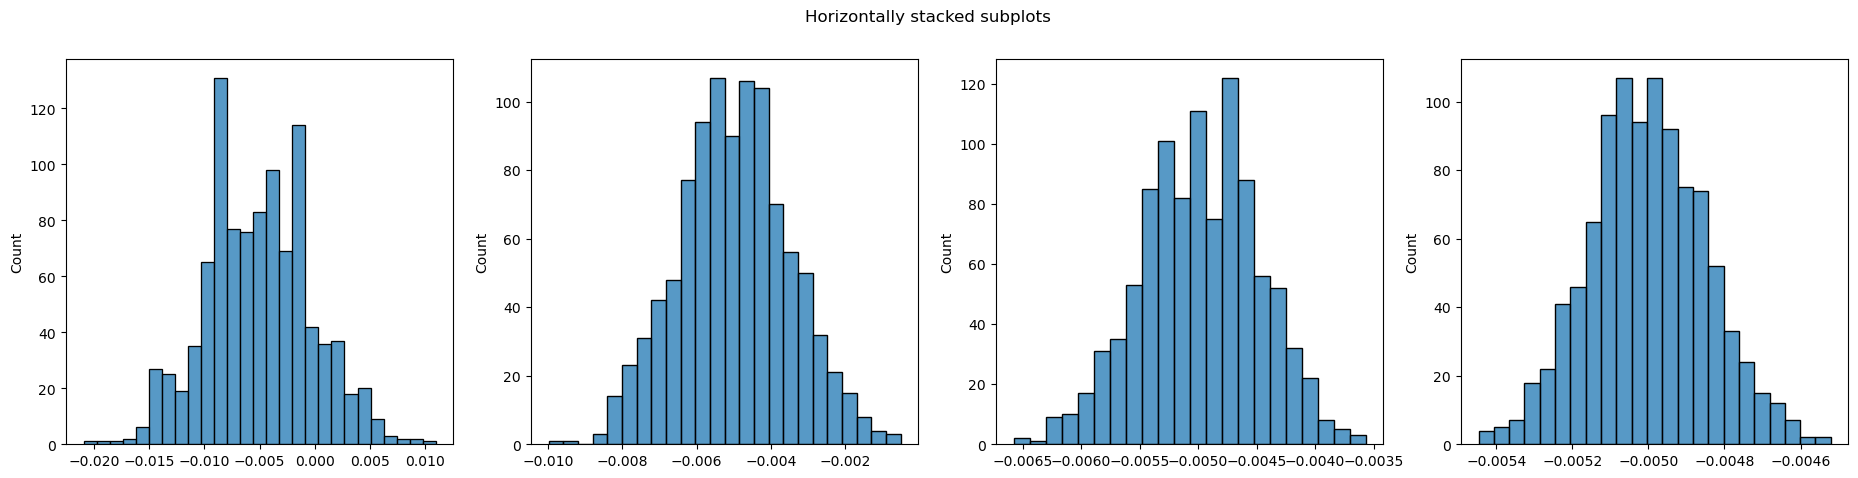

In [83]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_gains[4], ax = ax[0])
sns.histplot(big_list_gains[5], ax = ax[1])
sns.histplot(big_list_gains[6], ax = ax[2])
sns.histplot(big_list_gains[7], ax = ax[3])

<AxesSubplot:ylabel='Count'>

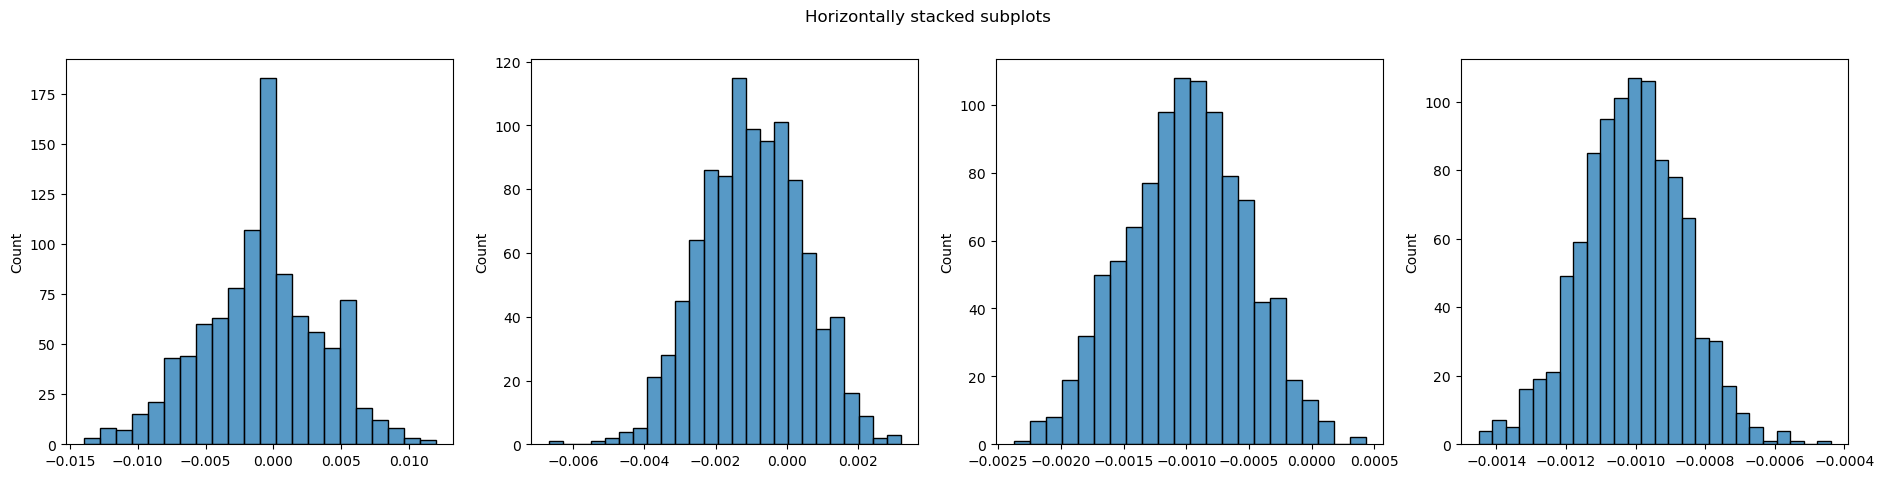

In [84]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))
fig.suptitle('Horizontally stacked subplots')
sns.histplot(big_list_gains[8], ax = ax[0])
sns.histplot(big_list_gains[9], ax = ax[1])
sns.histplot(big_list_gains[10], ax = ax[2])
sns.histplot(big_list_gains[11], ax = ax[3])

<AxesSubplot:ylabel='Count'>

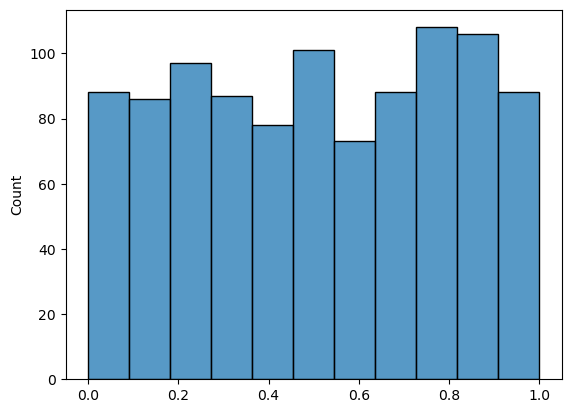

In [18]:
sns.histplot(big_list_probabs[0])

<AxesSubplot:ylabel='Count'>

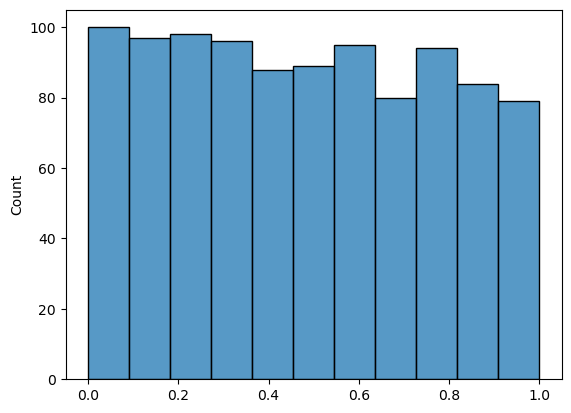

In [19]:
sns.histplot(big_list_probabs[1])

<AxesSubplot:ylabel='Count'>

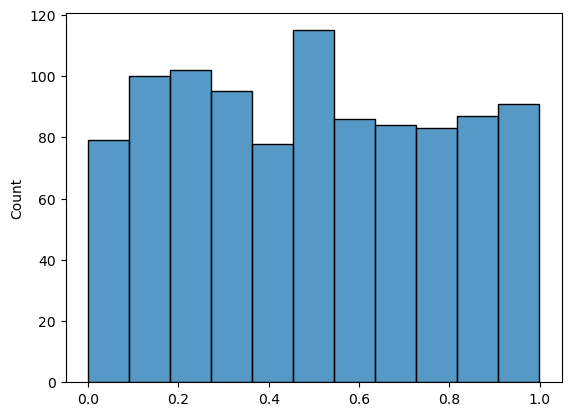

In [20]:
sns.histplot(big_list_probabs[2])

<AxesSubplot:ylabel='Count'>

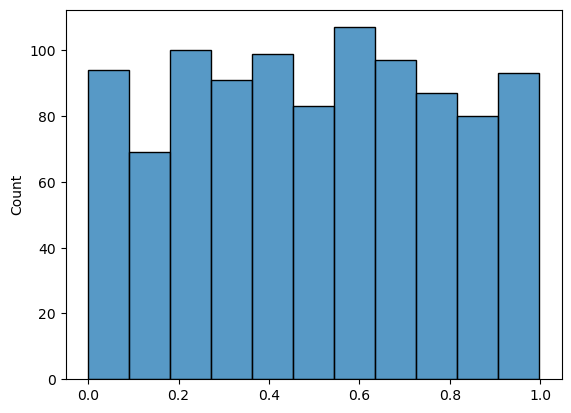

In [21]:
sns.histplot(big_list_probabs[3])

<AxesSubplot:ylabel='Count'>

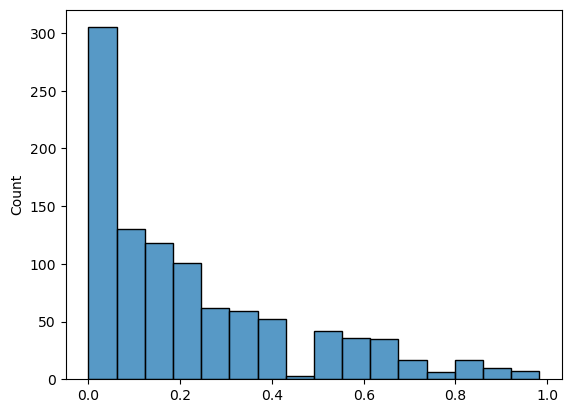

In [22]:
sns.histplot(big_list_probabs[4])

<AxesSubplot:ylabel='Count'>

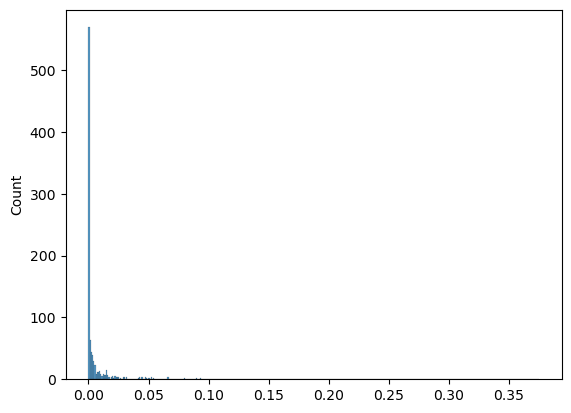

In [23]:
sns.histplot(big_list_probabs[5])

<AxesSubplot:ylabel='Count'>

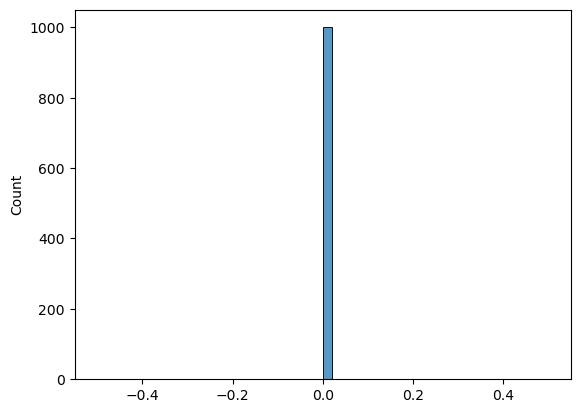

In [27]:
sns.histplot(big_list_probabs[6], bins = 50)

<AxesSubplot:ylabel='Count'>

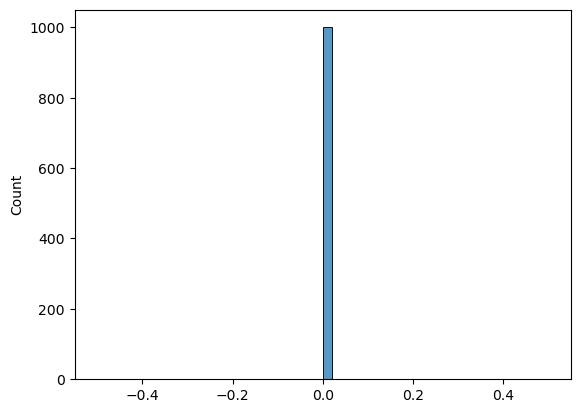

In [29]:
sns.histplot(big_list_probabs[7], bins = 50)

<AxesSubplot:ylabel='Count'>

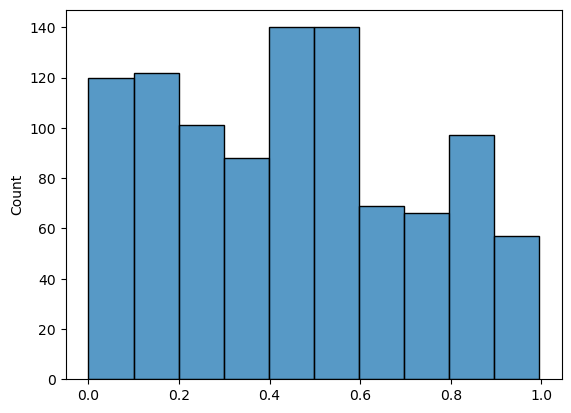

In [31]:
sns.histplot(big_list_probabs[8], bins = 10)

<AxesSubplot:ylabel='Count'>

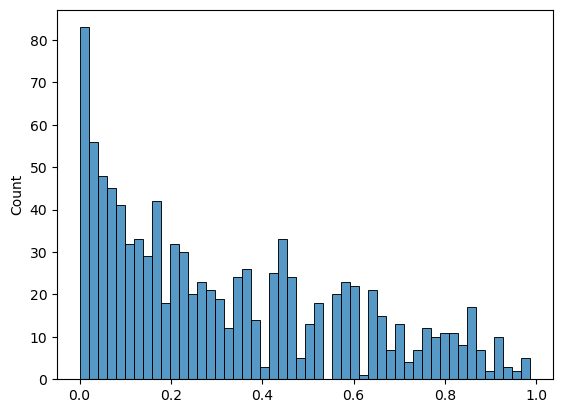

In [32]:
sns.histplot(big_list_probabs[9], bins = 50)

<AxesSubplot:ylabel='Count'>

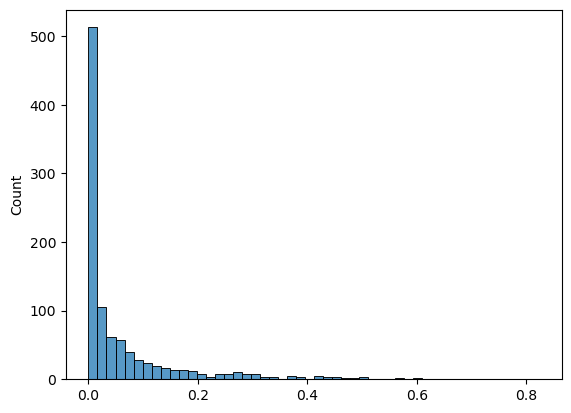

In [33]:
sns.histplot(big_list_probabs[10], bins = 50)

<AxesSubplot:ylabel='Count'>

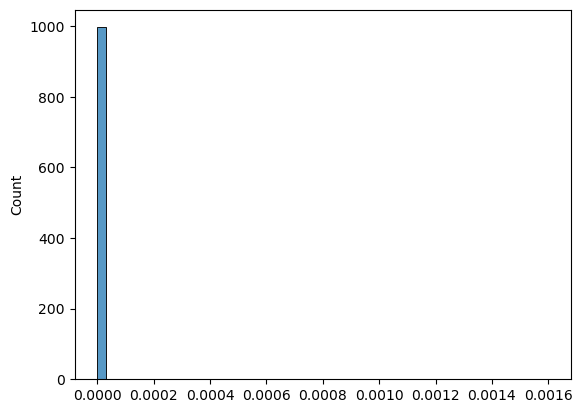

In [34]:
sns.histplot(big_list_probabs[11], bins = 50)

<AxesSubplot:ylabel='Count'>

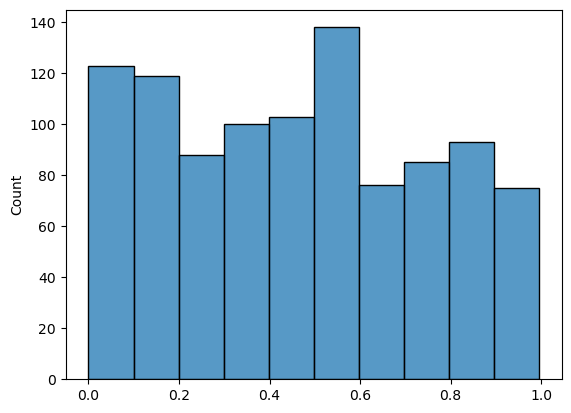

In [35]:
sns.histplot(big_list_probabs[12], bins = 10)

<AxesSubplot:ylabel='Count'>

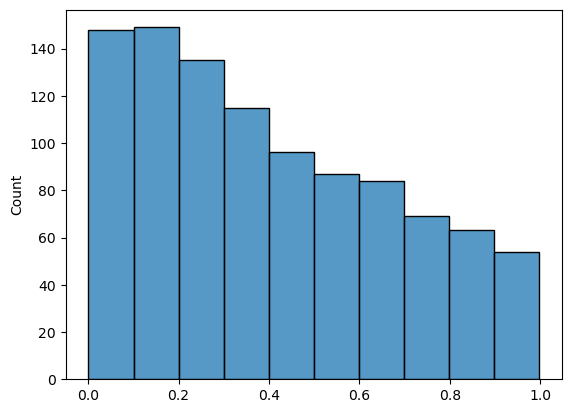

In [36]:
sns.histplot(big_list_probabs[13], bins = 10)

<AxesSubplot:ylabel='Count'>

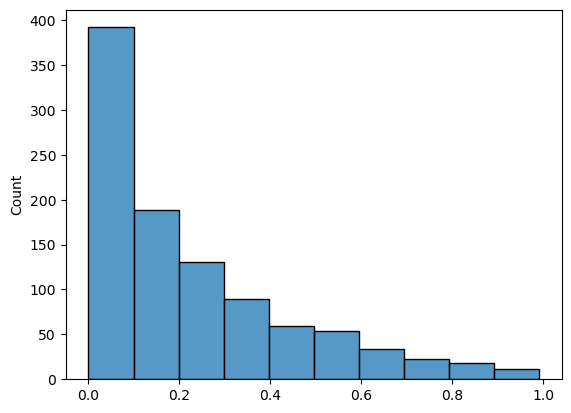

In [37]:
sns.histplot(big_list_probabs[14], bins = 10)

<AxesSubplot:ylabel='Count'>

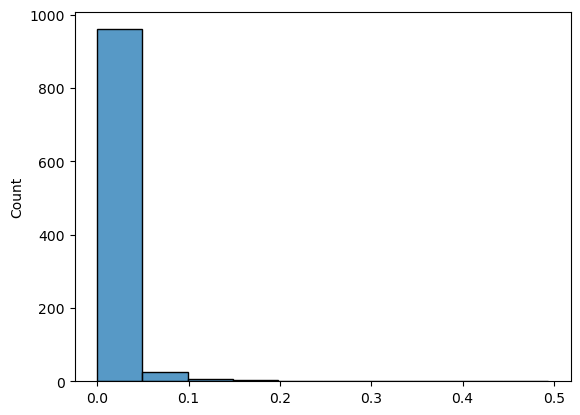

In [38]:
sns.histplot(big_list_probabs[15], bins = 10)


In [39]:
big_list_probabs.to_pickle('big_list_probabs')

AttributeError: 'list' object has no attribute 'to_pickle'

In [88]:
A = np.random.binomial(1,0.01,200000)
B = np.random.binomial(1,0.01,200000)

In [94]:
# CONVERSION RATE TEST
test_conversion = BinaryDataTest()

test_conversion.add_variant_data(name = "A", data = A, a_prior = 10, b_prior = 990)
test_conversion.add_variant_data(name = "B", data = B, a_prior = 10, b_prior = 990)

res_conv_test = test_conversion.evaluate(seed=42)

In [95]:
list_probabs = []
for i in range(1000):
    A = np.random.binomial(1,0.01,200000)
    B = np.random.binomial(1,0.01,200000)

    # CONVERSION RATE TEST
    test_conversion = BinaryDataTest()

    test_conversion.add_variant_data(name = "A", data = A, a_prior = 1, b_prior = 1)
    test_conversion.add_variant_data(name = "B", data = B, a_prior = 1, b_prior = 1)

    res_conv_test = test_conversion.evaluate(seed=42)
    list_probabs.append(res_conv_test[0]['prob_being_best'])

<AxesSubplot:ylabel='Count'>

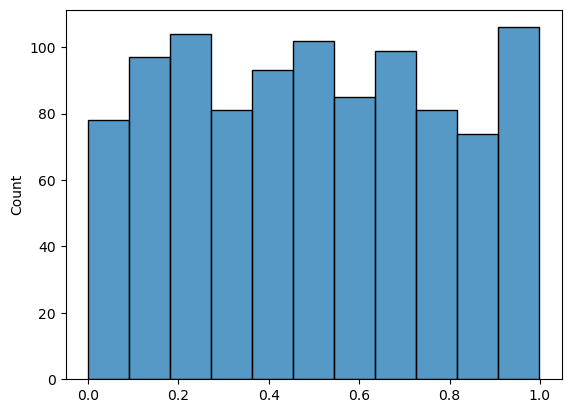

In [96]:
sns.histplot(list_probabs)

<AxesSubplot:ylabel='Count'>

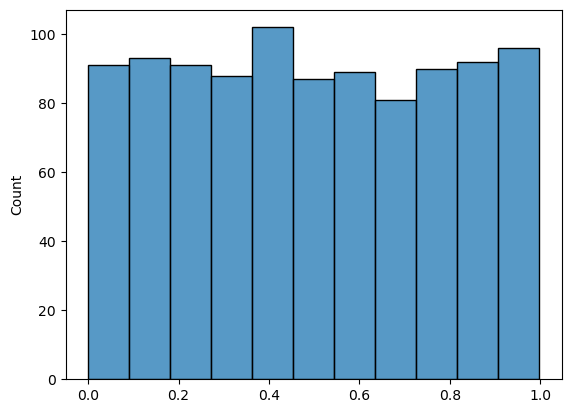

In [93]:
sns.histplot(list_probabs)

In [48]:
configure_offline_feature_store(workgroup="development", catalog_name="production")

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict[client_name]
    )

min_date = initial_data.meta_date.min()
max_date = initial_data.meta_date.max()
dates_list = [(min_date + timedelta(days=x)) for x in range((max_date-min_date).days + 1)]


2022-12-11 22:32:25,167 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c
DummyStatsClient._send unknown.athena_query_queue_ms:503.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:4590.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:35223518|c


In [57]:
total_logins = 0
list_total_logins = []
total_first_logins = 0
list_total_first_logins = []

for current_date in dates_list:
    print(current_date)
    total_logins += initial_data[initial_data.meta_date == current_date].shape[0]
    list_total_logins.append(total_logins)

    total_first_logins += len(initial_data[initial_data.first_login == current_date].user_id.unique())
    list_total_first_logins.append(total_first_logins)


2022-10-12 00:00:00
2022-10-13 00:00:00
2022-10-14 00:00:00
2022-10-15 00:00:00
2022-10-16 00:00:00
2022-10-17 00:00:00
2022-10-18 00:00:00
2022-10-19 00:00:00
2022-10-20 00:00:00
2022-10-21 00:00:00
2022-10-22 00:00:00
2022-10-23 00:00:00
2022-10-24 00:00:00
2022-10-25 00:00:00
2022-10-26 00:00:00
2022-10-27 00:00:00
2022-10-28 00:00:00
2022-10-29 00:00:00
2022-10-30 00:00:00
2022-10-31 00:00:00
2022-11-01 00:00:00
2022-11-02 00:00:00
2022-11-03 00:00:00
2022-11-04 00:00:00
2022-11-05 00:00:00
2022-11-06 00:00:00
2022-11-07 00:00:00
2022-11-08 00:00:00
2022-11-09 00:00:00
2022-11-10 00:00:00
2022-11-11 00:00:00
2022-11-12 00:00:00
2022-11-13 00:00:00
2022-11-14 00:00:00
2022-11-15 00:00:00
2022-11-16 00:00:00
2022-11-17 00:00:00
2022-11-18 00:00:00
2022-11-19 00:00:00
2022-11-20 00:00:00
2022-11-21 00:00:00
2022-11-22 00:00:00
2022-11-23 00:00:00
2022-11-24 00:00:00
2022-11-25 00:00:00
2022-11-26 00:00:00
2022-11-27 00:00:00
2022-11-28 00:00:00
2022-11-29 00:00:00
2022-11-30 00:00:00


<AxesSubplot:title={'center':'CONVERSION RATE TEST: Probability of P being better than C over the period of running the test'}, ylabel='P(P>C)'>

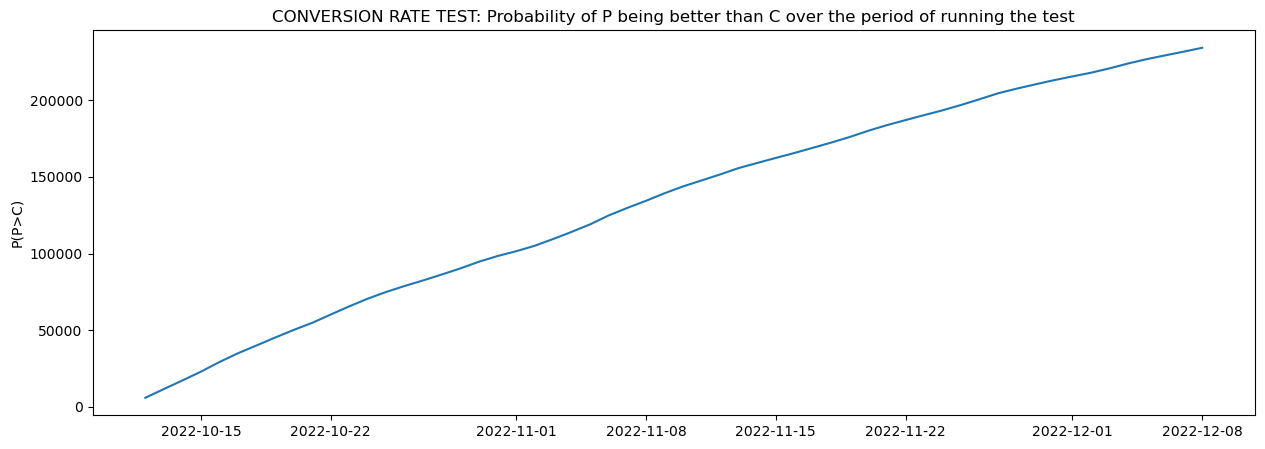

In [58]:
fig, ax = plt.subplots(figsize = (15,5))
ax.set_title('CONVERSION RATE TEST: Probability of P being better than C over the period of running the test')
ax.set_ylabel('P(P>C)')
sns.lineplot(x = dates_list, y = list_total_first_logins)

# Revenue test

### Getting reasonable parameters for the simulations

In [66]:
configure_offline_feature_store(workgroup="development", catalog_name="production")

2022-12-13 13:56:17,153 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c


conversion rate 0.0255305650744112
mean_positives 8.805949195060222
var_positives 141.4267439151859


DummyStatsClient._send unknown.athena_query_queue_ms:472.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:5094.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:42743395|c


<AxesSubplot:>

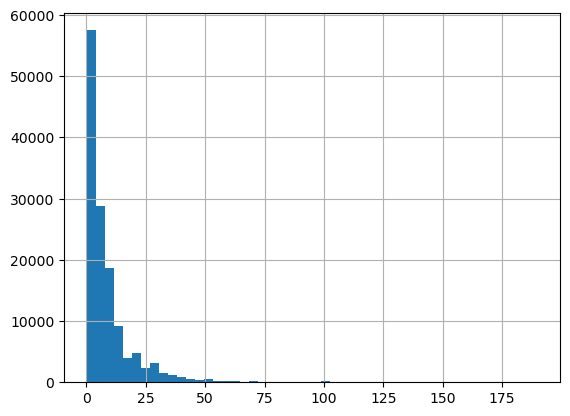

In [68]:
start_date = datetime(2022,10,13)
end_date = datetime(2022,12,9)
dates_list = [(start_date + timedelta(days=x)) for x in range((end_date-start_date).days + 1)]

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict['bingo_aloha_small'], parameters = {'strt_date': '2022-10-13' , 'end_date': '2022-12-09', 'strt_fl': '2020-01-01' , 'end_fl': '2022-12-09', 'spend_type': [1]}
    )


print("conversion rate", initial_data[initial_data.total_wins_spend > 0].shape[0]/initial_data.shape[0])
positive_spends = initial_data[initial_data.total_wins_spend > 0].total_wins_spend
print("mean_positives", np.mean(positive_spends))
print("var_positives", np.var(positive_spends))
positive_spends.hist(bins = 50)

2022-12-13 13:57:36,392 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c


conversion rate 0.04269507690462047
mean_positives 14.214781342725683
var_positives 490.78551644422606


DummyStatsClient._send unknown.athena_query_queue_ms:486.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:4841.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:38026241|c


<AxesSubplot:>

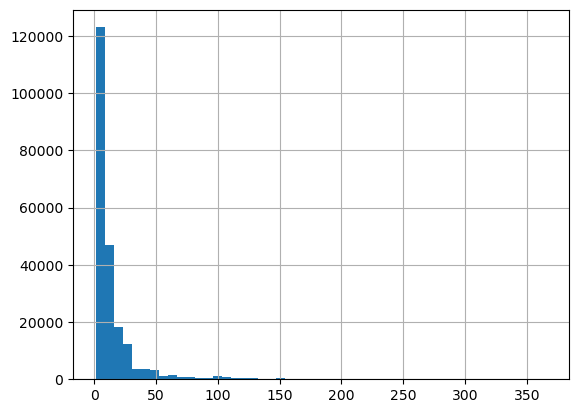

In [69]:
start_date = datetime(2022,10,13)
end_date = datetime(2022,12,9)
dates_list = [(start_date + timedelta(days=x)) for x in range((end_date-start_date).days + 1)]

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict['idle_mafia_small'], parameters = {'strt_date': '2022-10-13' , 'end_date': '2022-12-09', 'strt_fl': '2020-01-01' , 'end_fl': '2022-12-09', 'spend_type': [1]}
    )


print("conversion rate", initial_data[initial_data.total_wins_spend > 0].shape[0]/initial_data.shape[0])
positive_spends = initial_data[initial_data.total_wins_spend > 0].total_wins_spend
print("mean_positives", np.mean(positive_spends))
print("var_positives", np.var(positive_spends))
positive_spends.hist(bins = 50)

2022-12-13 13:58:55,875 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c


conversion rate 0.004021767710292076
mean_positives 19.17835028450717
var_positives 599.3445852056433


DummyStatsClient._send unknown.athena_query_queue_ms:583.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:4581.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:55922736|c


<AxesSubplot:>

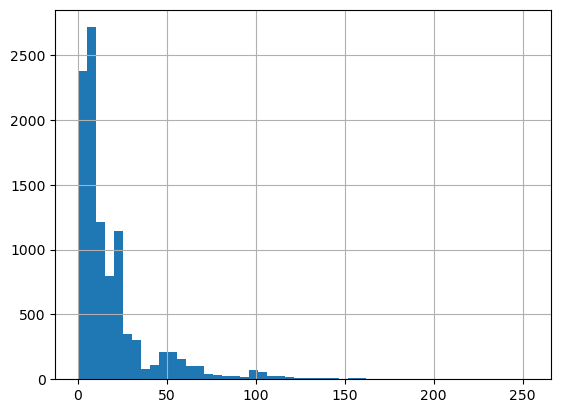

In [70]:
start_date = datetime(2022,10,13)
end_date = datetime(2022,12,9)
dates_list = [(start_date + timedelta(days=x)) for x in range((end_date-start_date).days + 1)]

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict['homw_small'], parameters = {'strt_date': '2022-10-13' , 'end_date': '2022-12-09', 'strt_fl': '2020-01-01' , 'end_fl': '2022-12-09', 'spend_type': [1]}
    )


print("conversion rate", initial_data[initial_data.total_wins_spend > 0].shape[0]/initial_data.shape[0])
positive_spends = initial_data[initial_data.total_wins_spend > 0].total_wins_spend
print("mean_positives", np.mean(positive_spends))
print("var_positives", np.var(positive_spends))
positive_spends.hist(bins = 50)

2022-12-13 14:08:30,612 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c


conversion rate 0.0036554122484401294
mean_positives 13.390769212357167
var_positives 3366.361362628422


DummyStatsClient._send unknown.athena_query_queue_ms:514.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:3527.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:39421506|c


<AxesSubplot:>

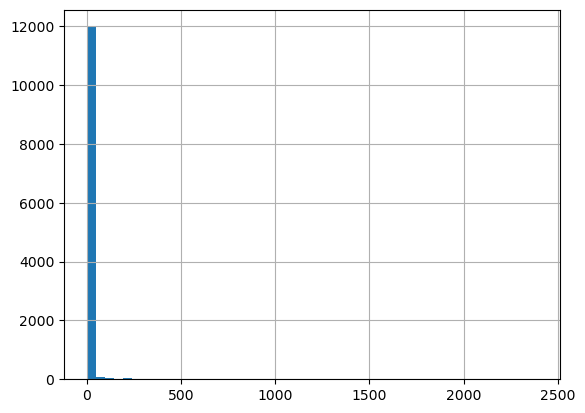

In [71]:
client_name = 'spongebob'

start_date = datetime(2022,10,13)
end_date = datetime(2022,12,9)
dates_list = [(start_date + timedelta(days=x)) for x in range((end_date-start_date).days + 1)]

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict[client_name]
    )

print("conversion rate", initial_data[initial_data.total_wins_spend > 0].shape[0]/initial_data.shape[0])
positive_spends = initial_data[initial_data.total_wins_spend > 0].total_wins_spend
print("mean_positives", np.mean(positive_spends))
print("var_positives", np.var(positive_spends))
positive_spends.hist(bins = 50)

2022-12-13 14:09:53,819 - botocore.credentials - INFO - Found credentials in shared credentials file: ~/.aws/credentials


DummyStatsClient._send unknown.athena_query_runs_total:1|c


conversion rate 0.004568822061095923
mean_positives 12.259893194460362
var_positives 442.86773413561247


DummyStatsClient._send unknown.athena_query_queue_ms:469.000000|ms
DummyStatsClient._send unknown.athena_query_execution_ms:3861.000000|ms
DummyStatsClient._send unknown.athena_query_scanned_bytes:28232487|c


<AxesSubplot:>

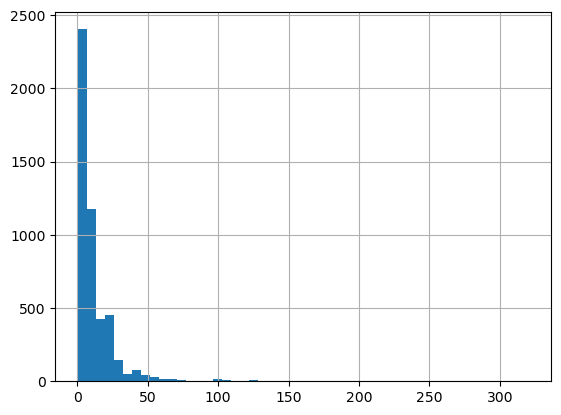

In [72]:
client_name = 'terra_genesis'

start_date = datetime(2022,10,13)
end_date = datetime(2022,12,9)
dates_list = [(start_date + timedelta(days=x)) for x in range((end_date-start_date).days + 1)]

initial_data = FeatureStoreOfflineClient.run_athena_query_pandas(
        queries_dict[client_name]
    )

print("conversion rate", initial_data[initial_data.total_wins_spend > 0].shape[0]/initial_data.shape[0])
positive_spends = initial_data[initial_data.total_wins_spend > 0].total_wins_spend
print("mean_positives", np.mean(positive_spends))
print("var_positives", np.var(positive_spends))
positive_spends.hist(bins = 50)

In [ ]:
list_beta_priors = [(1,1), (3,20), (0.1,9.9), (10,990)]
list_conversion_rates = [(0.01, 0.01), (0.01, 0.015), (0.01, 0.011), ((0.01, 0.0105))]
list_
list_num_points = [1000, 10000, 100000, 1000000]

In [ ]:
a_prior_beta_revenue_test_P = 0.1
b_prior_beta_revenue_test_P = 9.9
m_prior_revenue_test_P = 1
a_prior_ig_revenue_test_P = 0
b_prior_ig_revenue_test_P = 0
w_prior_revenue_test_P = 0.01

In [ ]:
[(1,1), (3,20), (0.1,9.9), (10,990)]

In [ ]:
NG(µ, λ|µ0, κ0, α0, β0)
def = N (µ|µ0,(κ0λ)
−1
)Ga(λ|α0, rate = β0)

In [2]:
def pdf_NIG(mus, sigmas_2, mu_param, w_param, alpha_param, beta_param):
    pdf = np.zeros((len(mus), len(sigmas_2)))
    for i, mu in enumerate(mus):
        for j, sigma_2 in enumerate(sigmas_2):
            pdf[i,j] = scipy.stats.norm.pdf(mu, mu_param, sigma_2/w_param)*scipy.stats.invgamma.pdf(sigma_2, alpha_param, beta_param)

    return pdf

In [3]:
mus = np.linspace(-3,3, 100)
sigmas_2 = np.linspace(0, 3, 100)
pdf = pdf_NIG(mus, sigmas_2, 0,2,1,1)

c:\Users\karol\anaconda3\envs\assetario_ab_testing_3_8\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


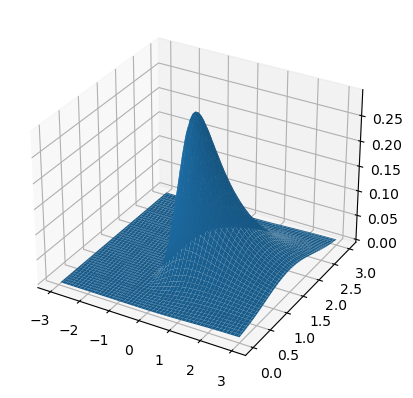

In [4]:
# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(mus, sigmas_2)
ax.plot_surface(X, Y, pdf)

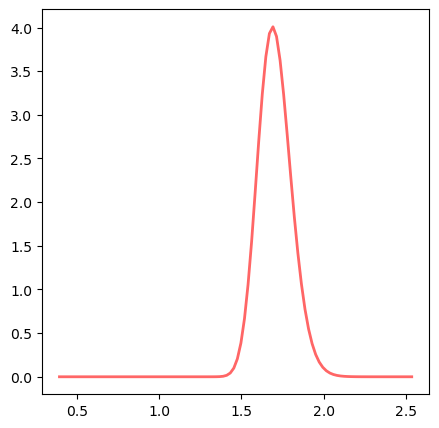

In [18]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(scipy.stats.lognorm.ppf(0.01, s = 0.4),
                scipy.stats.lognorm.ppf(0.99, s = 0.4), 100)
ax.plot(x, scipy.stats.lognorm.pdf(x, 0.1, 0.7),
       'r-', lw=2, alpha=0.6, label='norm pdf')

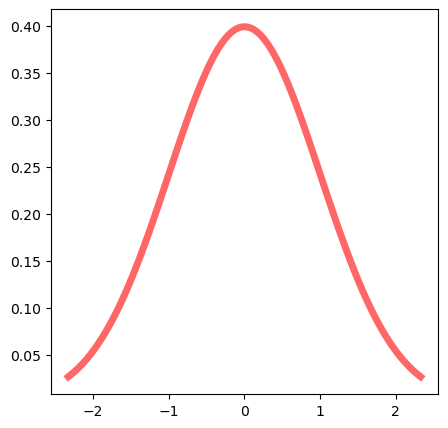

In [20]:
fig, ax = plt.subplots(figsize = (5,5))
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

<AxesSubplot:ylabel='Count'>

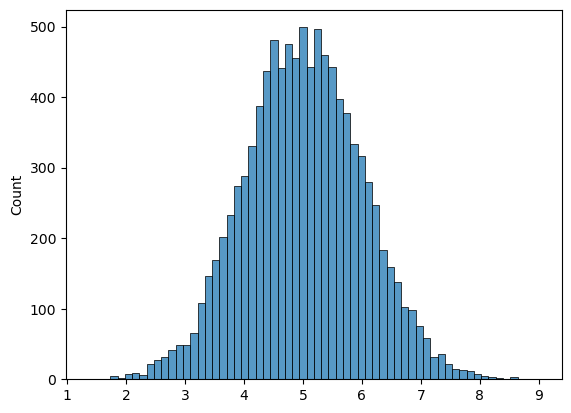

In [48]:
normal_vector = np.random.normal(5,1,10000)
sns.histplot(normal_vector)

<AxesSubplot:ylabel='Count'>

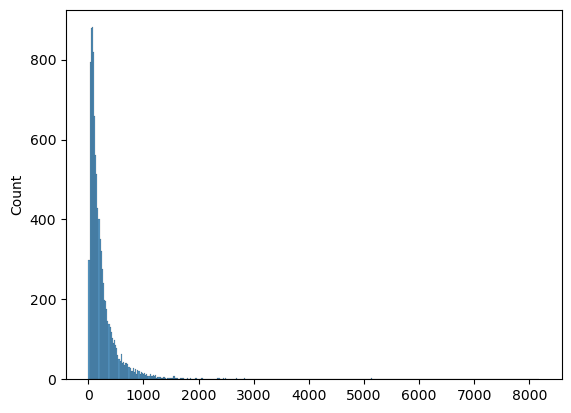

In [49]:
sns.histplot(np.exp(normal_vector))

<AxesSubplot:ylabel='Count'>

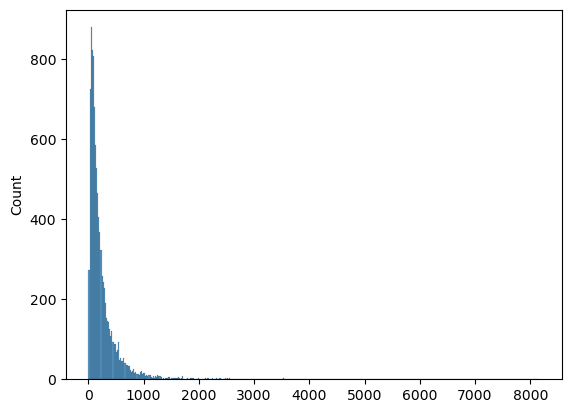

In [50]:
lognormal_vector = np.random.lognormal(5,1,10000)
sns.histplot(lognormal_vector)